## Imports

In [ ]:
from pathlib import Path
import time

import torch

from tfvspt.config.config import get_config
from tfvspt.pt.data import ClassificationDataset
from tfvspt.pt.data import get_dataloader
from tfvspt.pt.data import get_transforms
from tfvspt.pt.eval import eval_model
from tfvspt.pt.utils import plot_images
from tfvspt.tf.data import Dataset as TFDataset

## Config

In [2]:
config = get_config("../../assets/config.yaml")
config

Config(seed=25, n_classes=100, bs=32, imgsz=(32, 32), lr=0.001, epochs=20, num_workers=2, output='./output')

## Test Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = TFDataset.get_data()
print(f"Testdata size: {len(x_test)}")

Testdata size: 10000


In [7]:
st = time.time()
test_ds = ClassificationDataset(config=config, images=x_test, labels=y_test, transforms=get_transforms(data="test"))
test_dataloader = get_dataloader(dataset=test_ds, data="test", config=config)
print(f"[PT] Dataset loading time: {time.time() - st}")

[PT] Dataset loading time: 0.0003070831298828125


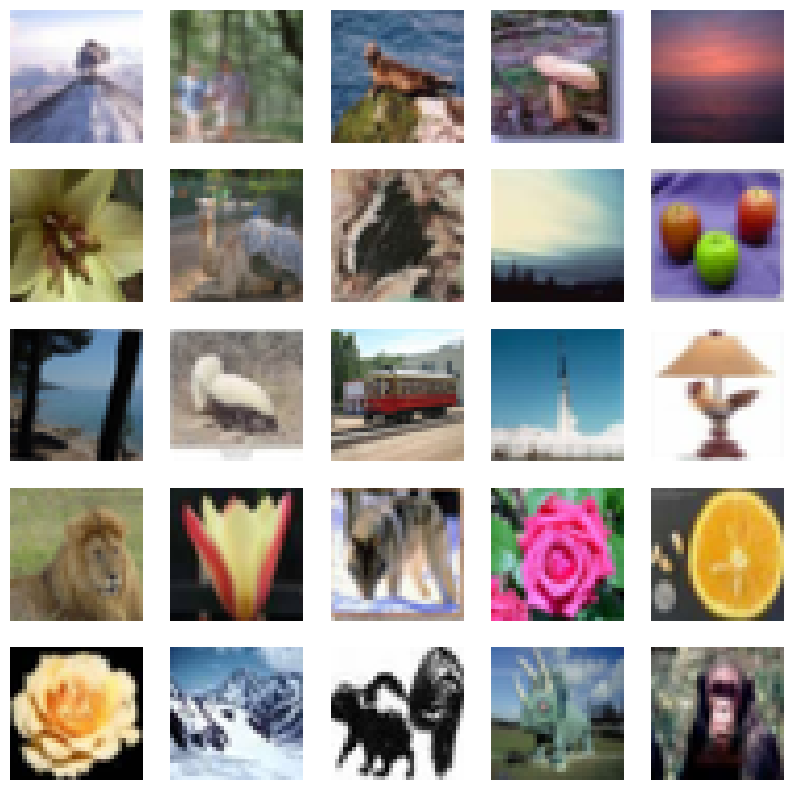

In [13]:
plot_images(test_dataloader)

## Load Model

In [11]:
model_path = Path(config.output) / "pt/cifar100.pt"

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.jit.load(str(model_path))

## Eval

In [14]:
st = time.time()
results = eval_model(
    dataloader=test_dataloader,
    model=model,
    criterion=torch.nn.CrossEntropyLoss(),
    device=device,
)
print(f"[PT] Evaluation Results: {results}")
print(f"[PT] Evaluation time: {time.time() - st}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 136.92it/s]

[PT] Evaluation Results: {'loss': 2.206257000517921, 'accuracy': 0.437}
[PT] Evaluation time: 2.29127836227417
